# Evaluate simple linear regression

In this activity I will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, I will to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about the budget allocated for marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, decisions about where to focus future marketing efforts will be made, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

### Import packages

In [1]:
# Import pandas, pyplot from matplotlib, and seaborn.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

In [3]:
# Load the data.

data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head()

TV      Radio  Social_Media       Sales
0  16.0   6.566231      2.907983   54.732757
1  13.0   9.237765      2.409567   46.677897
2  41.0  15.886446      2.913410  150.177829
3  83.0  30.020028      6.922304  298.246340
4  15.0   8.437408      1.405998   56.594181

### Perform EDA

In [4]:
# Display the shape of the data as a tuple (rows, columns).

data.shape

(4572, 4)

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, I use `describe()` to generate descriptive statistics for these three variables.

In [5]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV','Radio','Social_Media']].describe()

TV        Radio  Social_Media
count  4562.000000  4568.000000   4566.000000
mean     54.066857    18.160356      3.323956
std      26.125054     9.676958      2.212670
min      10.000000     0.000684      0.000031
25%      32.000000    10.525957      1.527849
50%      53.000000    17.859513      3.055565
75%      77.000000    25.649730      4.807558
max     100.000000    48.871161     13.981662

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [13]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.0%


The preceding output shows that 0.13% of rows are missing the `Sales` value.

Remove all rows in the data from which `Sales` is missing.

In [14]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)

### Visualize the sales distribution

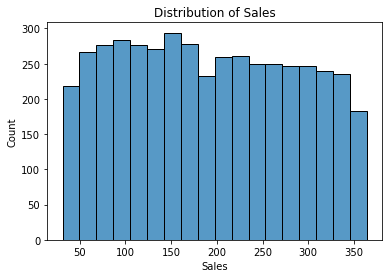

In [15]:
# Create a histogram of the Sales.

fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title('Distribution of Sales');

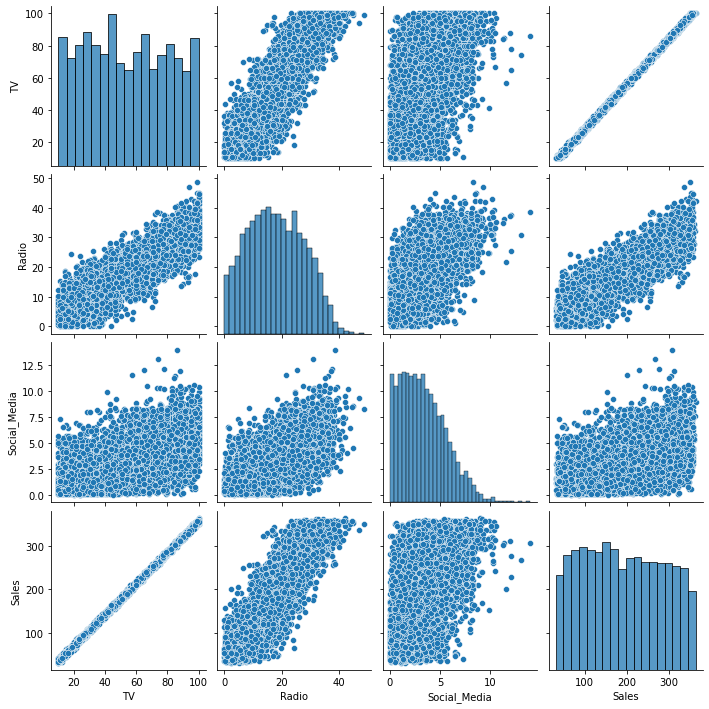

In [12]:
# Create a pairplot of the data.

sns.pairplot(data);

Looking at the pairplot, I chose to select `TV` as the independent variable. `TV` clearly has the strongest linear relationship with `Sales`. You could draw a straight line through the scatterplot of `TV` and `Sales` that confidently estimates `Sales` using `TV`. `Radio` and `Sales` appear to have a linear relationship, but there is larger variance than between `TV` and `Sales`.

### Build and fit the model

In [16]:
# Define the OLS (Ordinary Least Squares) formula.
ols_formula = 'Sales ~ TV' #dependent ~ independent

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model, or estimate the coefficents for the line of best fit.
model = OLS.fit()

# Save the results summary, will show coefficients, p value, confidence interval.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Fri, 03 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:39:56   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To justify using simple linear regression, the four linear regression assumptions can not be violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables.

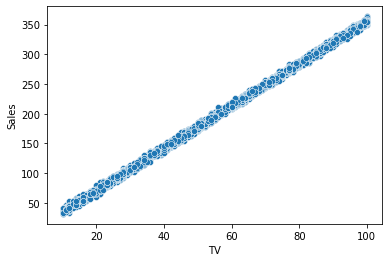

In [19]:
# Scatterplot comparing X and Sales (Y). 

sns.scatterplot(x = data['TV'], y = data['Sales']);

There is a clear linear relationship between `TV` and `Sales`, meeting the linearity assumption, also seen in the pairplot.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The **normality assumption** states that the errors are normally distributed. To prove this, I will create two plots.

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

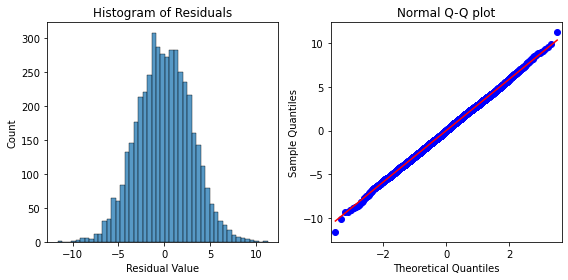

In [27]:
# Calculate the residuals and create a plot.

residuals = model.resid

# create a 1x2 grid of total size 8x4, meaning theres 2 plots side by side

fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot, axes[0].
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot, axes[1].
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

The histogram of the residuals seem to be normally distributed, which supports that the normality assumption is met for this model. In addition, the residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

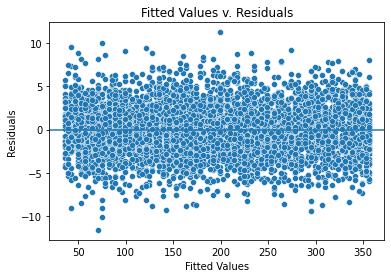

In [29]:
# Create a scatterplot with the fitted values (predicted values) from the model as x and the residuals as y.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

The variance of the residuals appears to be consistant across all $X$. Thus, the assumption of homoscedasticity is met.

### Display the OLS regression results

Since the linearity assumptions are met, I can interpret the model results accurately.

In [14]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:28   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results

Using `TV` as X results in a simple linear regression model with $R^{2} = 0.999$. However, the R-squared value is dependent on the variable selected for X. 


### Interpret the model results

When `TV` is used as the independent variable X,
- The coefficient for the `Intercept` is -0.1263 and the coefficient for `TV` is 3.5614.
- The linear equation is $\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$

According to the model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

### Measure the uncertainty of the coefficient estimates

In [15]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:28   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When `TV` is used as the independent variable, 
- p-value of $0.000$, which is less than industry standard of 0.05, thus the results are statistically significant and the null hypothesis is rejected.
- In this context, the null hypothesis is that there is no relationship between TV promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between TV promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.
- A $95\%$ confidence interval of $[3.558,3.565]$. 
- This means there is a $95\%$ chance the interval $[3.558,3.565]$ contains the true parameter value of the slope. 

These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact `TV` has on `Sales`.

Potential areas to explore include:

* Providing the business with the estimated sales given different TV promotional budgets
* Using both `TV` and `Radio` as independent variables
* Adding plots to help convey the results, such as using the `seaborn` `regplot()` to plot the data with a best fit regression line

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales. 

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 